## Assignment on model fine tuning

#### Prepared by: Amritha R J

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("credit_card_default.csv")

In [3]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [4]:
#First five rows of the dataframe
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [5]:
#Last five rows of the dataframe
df.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[5 rows x 25 columns]

In [6]:
#No. of rows and columns in the dataframe
df.shape

(30000, 25)

In [7]:
#List of all columns present in the dataframe
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#Summary
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.553667   
std     8660.398374   129747.661567      0.489129      0.790349      0.518326   
min        1.000000    10000.000000      1.000000      0.000000      1.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_1         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [9]:
#Checking for null values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
#Checking for duplicate values
df.duplicated().sum()

0

In [76]:
df.nunique()

id             30000
limit_bal         81
sex                2
education          7
marriage           3
age               56
pay_1             11
pay_2             11
pay_3             11
pay_4             11
pay_5             10
pay_6             10
bill_amt1      22723
bill_amt2      22346
bill_amt3      22026
bill_amt4      21548
bill_amt5      21010
bill_amt6      20604
pay_amt1        7943
pay_amt2        7899
pay_amt3        7518
pay_amt4        6937
pay_amt5        6897
pay_amt6        6939
default            2
male               2
grad_school        2
university         2
married            2
dtype: int64

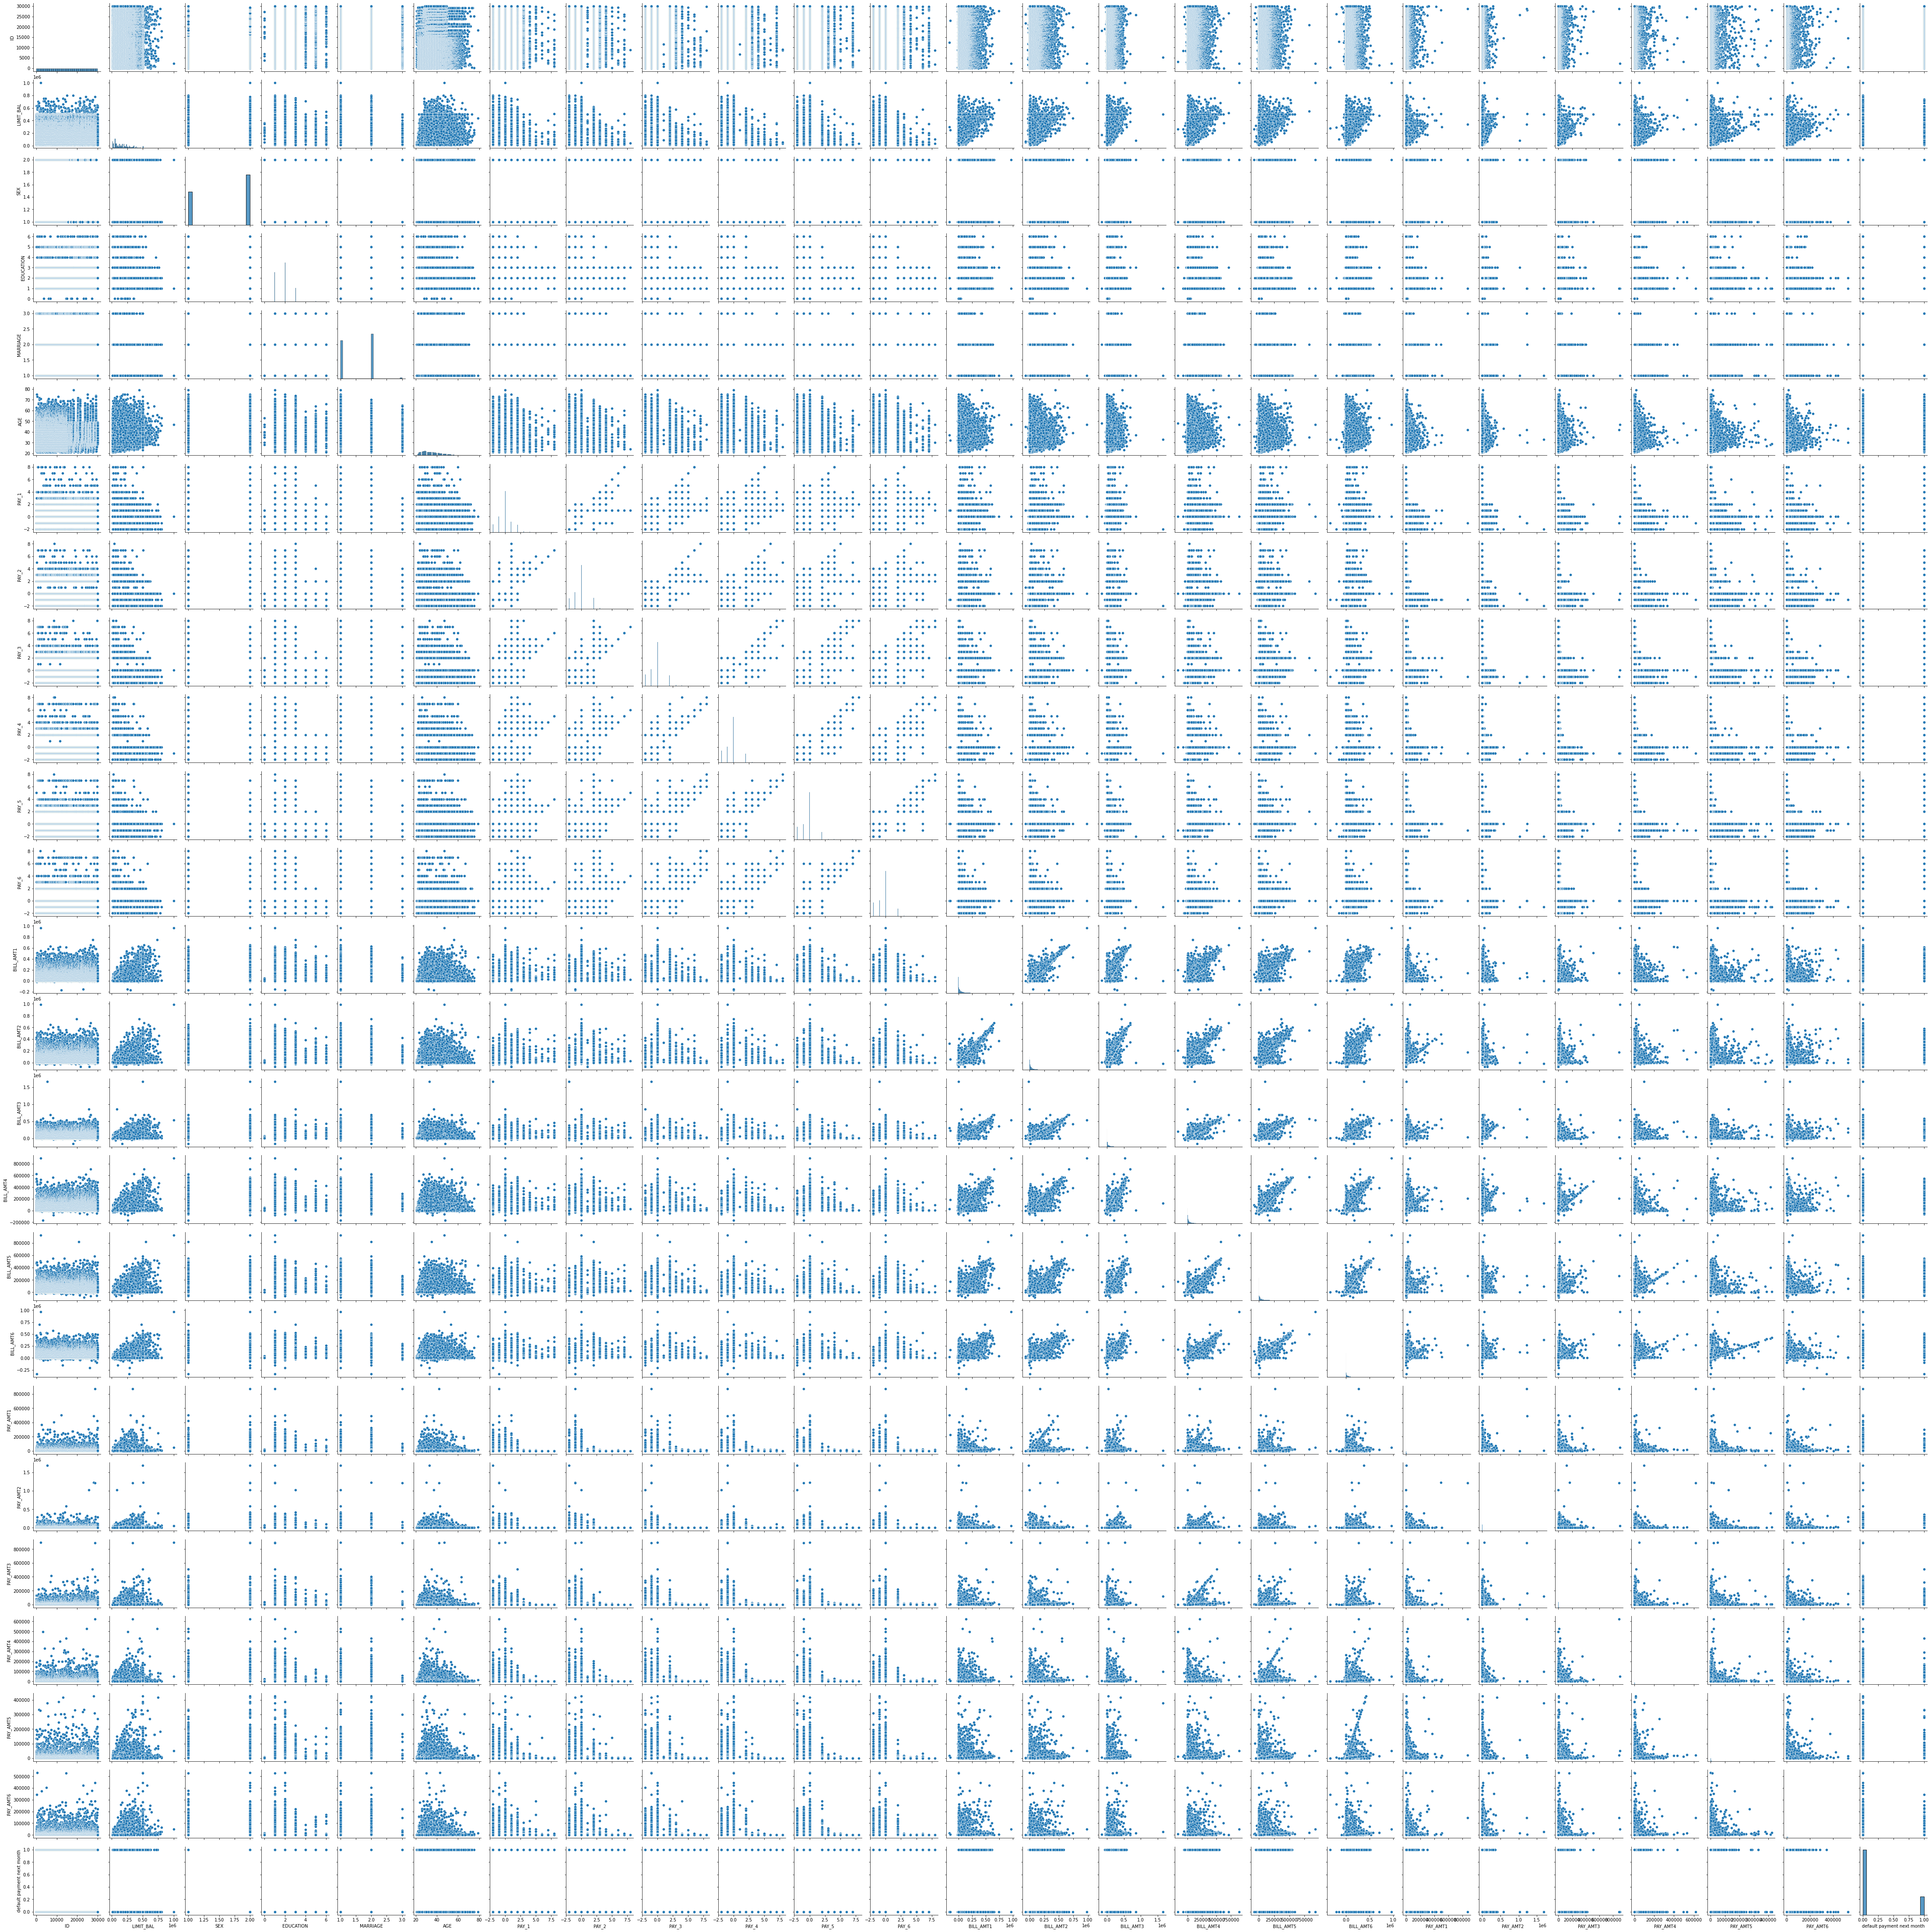

In [13]:
#Pairplot
sns.pairplot(df)
plt.show()

In [14]:
df = df.rename(columns = lambda x: x.lower())

In [15]:
df = df.rename(columns = {"default payment next month":"default"})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   limit_bal  30000 non-null  int64
 2   sex        30000 non-null  int64
 3   education  30000 non-null  int64
 4   marriage   30000 non-null  int64
 5   age        30000 non-null  int64
 6   pay_1      30000 non-null  int64
 7   pay_2      30000 non-null  int64
 8   pay_3      30000 non-null  int64
 9   pay_4      30000 non-null  int64
 10  pay_5      30000 non-null  int64
 11  pay_6      30000 non-null  int64
 12  bill_amt1  30000 non-null  int64
 13  bill_amt2  30000 non-null  int64
 14  bill_amt3  30000 non-null  int64
 15  bill_amt4  30000 non-null  int64
 16  bill_amt5  30000 non-null  int64
 17  bill_amt6  30000 non-null  int64
 18  pay_amt1   30000 non-null  int64
 19  pay_amt2   30000 non-null  int64
 20  pay_amt3   30000 non-null  int64
 21  pay_amt4   3

In [17]:
df['sex'].value_counts()

2    18112
1    11888
Name: sex, dtype: int64

In [18]:
df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [19]:
df['marriage'].value_counts()

2    15964
1    13713
3      323
Name: marriage, dtype: int64

In [20]:
df["male"] = (df['sex'] == 1).astype(int)

In [21]:
df['grad_school'] = (df['education']==1).astype(int)

In [22]:
df["university"] = (df['education']==2).astype(int)

In [23]:
df["married"] = (df['marriage']==1).astype(int)

In [24]:
df[['male',"grad_school","university","married"]]

male  grad_school  university  married
0         0            0           1        1
1         0            0           1        0
2         0            0           1        0
3         0            0           1        1
4         1            0           1        1
...     ...          ...         ...      ...
29995     1            0           0        1
29996     1            0           0        0
29997     1            0           1        0
29998     1            0           0        1
29999     1            0           1        1

[30000 rows x 4 columns]

In [25]:
df

id  limit_bal  sex  education  marriage  age  pay_1  pay_2  pay_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       pay_4  ...  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  default  \
0         -1  ...       689         0         0         0         0        1   
1          0  ...      1000      1000      1000         0      2000        1   
2          0  ...      1500      1000      1000      1000      5000        0   
3          0  ...      2019      1200      1100      1069      1000        0   
4          0  ...     36681     10000      9000       689       679        0   
...      ...  ...       ...       ...       ...       ...       ...      ...   
29995      0  ...     20000      5003      3047      5000      1000        0   
29996     -1  ...      3526      8998       129         0         0        0   
29997     -1  ...         0     22000      4200      2000      3100        1   
29998      0  ...      3409      1178      1926     52964      1804        1   
29999      0  ...      1800      1430      1000      1000      1000        1   

       male  grad_school  university  married  
0         0            0           1        1  
1         0            0           1        0  
2         0            0           1        0  
3         0            0           1        1  
4         1            0           1        1  
...     ...          ...         ...      ...  
29995     1            0           0        1  
29996     1            0           0        0  
29997     1            0           1        0  
29998     1            0           0        1  
29999     1            0           1        1  

[30000 rows x 29 columns]

In [26]:
bill_amt_features = ["bill_amt" + str(i) for i in range(1,7)]
pay_amt_features = ["pay_amt" + str(i) for i in range(1,7)]

In [27]:
binary_features = ['male', 'grad_school', 'university', 'married']

In [28]:
pay_features = ["pay_" + str(i) for i in range(1,7)]

In [29]:
num_features = ["limit_bal", "age"] + bill_amt_features + pay_amt_features + pay_features

In [31]:
x = df[num_features + binary_features]
y = df['default']

In [32]:
x

limit_bal  age  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
0          20000   24       3913       3102        689          0          0   
1         120000   26       2682       1725       2682       3272       3455   
2          90000   34      29239      14027      13559      14331      14948   
3          50000   37      46990      48233      49291      28314      28959   
4          50000   57       8617       5670      35835      20940      19146   
...          ...  ...        ...        ...        ...        ...        ...   
29995     220000   39     188948     192815     208365      88004      31237   
29996     150000   43       1683       1828       3502       8979       5190   
29997      30000   37       3565       3356       2758      20878      20582   
29998      80000   41      -1645      78379      76304      52774      11855   
29999      50000   46      47929      48905      49764      36535      32428   

       bill_amt6  pay_amt1  pay_amt2  ...  pay_1  pay_2  pay_3  pay_4  pay_5  \
0              0         0       689  ...      2      2     -1     -1     -2   
1           3261         0      1000  ...     -1      2      0      0      0   
2          15549      1518      1500  ...      0      0      0      0      0   
3          29547      2000      2019  ...      0      0      0      0      0   
4          19131      2000     36681  ...     -1      0     -1      0      0   
...          ...       ...       ...  ...    ...    ...    ...    ...    ...   
29995      15980      8500     20000  ...      0      0      0      0      0   
29996          0      1837      3526  ...     -1     -1     -1     -1      0   
29997      19357         0         0  ...      4      3      2     -1      0   
29998      48944     85900      3409  ...      1     -1      0      0      0   
29999      15313      2078      1800  ...      0      0      0      0      0   

       pay_6  male  grad_school  university  married  
0         -2     0            0           1        1  
1          2     0            0           1        0  
2          0     0            0           1        0  
3          0     0            0           1        1  
4          0     1            0           1        1  
...      ...   ...          ...         ...      ...  
29995      0     1            0           0        1  
29996      0     1            0           0        0  
29997      0     1            0           1        0  
29998     -1     1            0           0        1  
29999      0     1            0           1        1  

[30000 rows x 24 columns]

In [33]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 5)

In [41]:
sc_features = ["limit_bal", "age"] + bill_amt_features + pay_amt_features

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
x_train.loc[:,sc_features] = sc.fit_transform(x_train[sc_features])
x_test.loc[:,sc_features] = sc.transform(x_test[sc_features])

C:\Users\AMRITHA R J\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\AMRITHA R J\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [45]:
from sklearn.cluster import KMeans

In [46]:
kmc = KMeans(n_clusters=3)

In [47]:
kmc.fit(x_train,y_train)

KMeans(n_clusters=3)

In [49]:
pred_kmc = kmc.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score, precision_score

In [57]:
accuracy_kmc = accuracy_score(y_test, pred_kmc)
accuracy_kmc

0.24

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [55]:
pred_grad = gb.predict(x_test)

In [58]:
accuracy_grad = accuracy_score(y_test, pred_grad)
accuracy_grad

0.822

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_model=LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [61]:
pred_log = log_model.predict(x_test)

In [62]:
accuracy_log = accuracy_score(y_test, pred_log)
accuracy_log

0.8115

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
KNN = KNeighborsClassifier(n_neighbors = 2)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [70]:
pred_knn = KNN.predict(x_test)

In [71]:
accuracy_knn = accuracy_score(y_test, pred_knn)
accuracy_knn

0.7913333333333333

In [72]:
from sklearn import svm
model = svm.SVC(kernel='linear')

In [73]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [74]:
pred_svm = model.predict(x_test)

In [75]:
accuracy_svm = accuracy_score(y_test, pred_svm)
accuracy_svm

0.8106666666666666